In [1]:
import matplotlib.pyplot as plt
from ase.optimize.sciopt import *               
from ase.utils.geometry import *
from ase.lattice.spacegroup import crystal
from ase.visualize import *
from ase.lattice.surface import surface
from ase import Atoms
from ase import io
from ase.io.cif import read_cif
from ase.io.vasp import write_vasp
from abtem.visualize import show_atoms
from ase.visualize.plot import plot_atoms
from ase.build import add_adsorbate

from ase import neighborlist
from ase.build import molecule
from scipy import sparse


/home/ahlawat/.local/lib/python3.9/site-packages/ase/utils/geometry.py:8: UserWarning: Moved to ase.geometry and ase.build
  warnings.warn('Moved to ase.geometry and ase.build')
/home/ahlawat/.local/lib/python3.9/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')
/home/ahlawat/.local/lib/python3.9/site-packages/ase/lattice/surface.py:17: UserWarning: Moved to ase.build
  warnings.warn('Moved to ase.build')


In [3]:
! rm *.vasp

# FAPbI3 structures are taken from: http://dx.doi.org/10.1021/ic401215x

### below FA are placed to rectify unit cells

## cubic 3R polymorph: https://dx.doi.org/10.5517/cc11hdwt
- Experimental data
 - Space group 	P 3 m 1 (156)
 - Unit cell 	a 8.9817(13)Å b 8.9817(13)Å c 11.006(2)Å
 - α 90.00° β 90.00° γ 120.00°
 - Cell volume 	768.91
 - Reduced cell 	a 8.982Å b 8.982Å c 11.006Å
 - α 90.000° β 90.000° γ 120.000°
 - Habit 	hexagonal plate
 - Polymorph 	alpha polymorph

In [3]:
structure = io.read('cubic_3R.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
del_index = []
N_index = []
flag = False

while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'C'):
        del_index.append(i)
        molecule = io.read('FA.pdb')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1
    
k = 0
while k < num_atoms:
    if(structure.get_chemical_symbols()[k] == 'N'):
        del_index.append(k)
    k = k + 1

del structure[del_index]  


FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

view (FA_replaced_structure)



<Popen: returncode: None args: ['/home/ahlawat/miniconda3/bin/python', '-m',...>

### prepare vasp/quantum espresso input file

In [4]:
supercell = FA_replaced_structure.repeat((1,1,2))
supercell = sort(supercell)

view(supercell)

write_vasp('cubic_112.vasp', supercell, vasp5=True, direct=True)

supercell

Atoms(symbols='C6H30I18N12Pb6', pbc=True, cell=[[8.9817, 0.0, 0.0], [-4.490849999999998, 7.778380369170693, 0.0], [0.0, 0.0, 22.012]], atomtypes=..., bfactor=..., occupancy=..., residuenames=..., residuenumbers=..., spacegroup_kinds=...)

## tetragonal polymorph:https://dx.doi.org/10.5517/cc11hdrp
- Experimental data
  - Formula 	(I36 Pb12 12-)n,12n(C H5 N2 +)
  - Crystal details
  - Space group 	P 3 (143)
  - Unit cell 	a 17.7914(8)Å b 17.7914(8)Å c 10.9016(6)Å
  - α 90.00° β 90.00° γ 120.00°
  - Cell volume 	2988.42
  - Reduced cell 	a 10.902Å b 17.791Å c 17.791Å
  - α 120.000° β 90.000° γ 90.000°
  - Habit 	hexagonal plate
  - Polymorph 	beta polymorph

In [5]:
structure = io.read('beta.cif')
structure = sort(structure)
view (structure)

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'Trigonal' is not interpreted for space group Spacegroup(143, setting=1). This may result in wrong setting!
  warnings.warn(


<Popen: returncode: None args: ['/home/ahlawat/miniconda3/bin/python', '-m',...>

Text(0, 0.5, 'y[$\\AA$]')

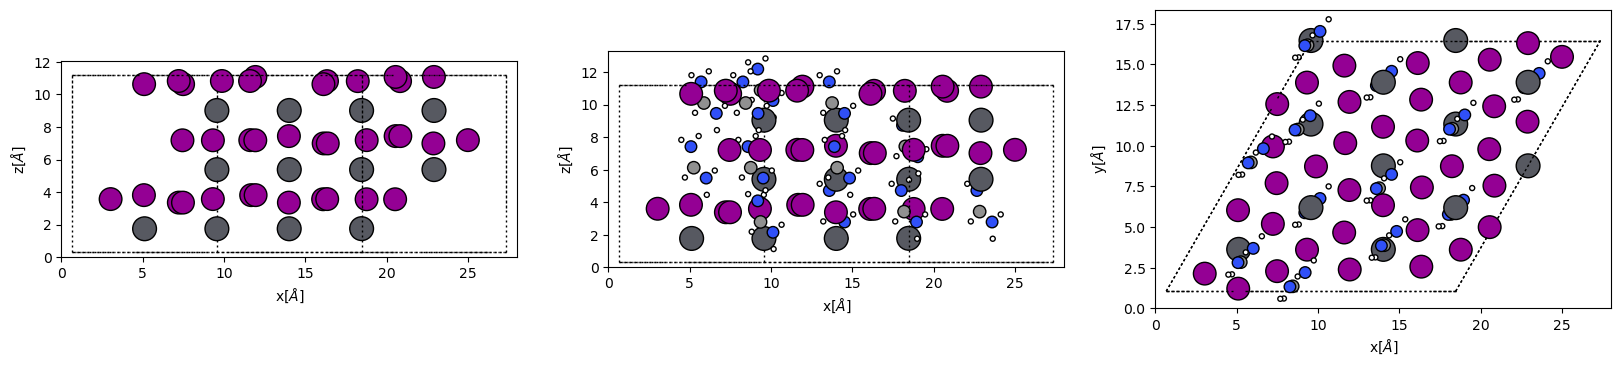

In [6]:
structure = io.read('beta.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
del_index = []
N_index = []
flag = False

while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'C'):
        del_index.append(i)
        molecule = io.read('FA.pdb')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1
    
k = 0
while k < num_atoms:
    if(structure.get_chemical_symbols()[k] == 'N'):
        del_index.append(k)
    k = k + 1

del structure[del_index]  


FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

view (FA_replaced_structure)

# supercell = FA_replaced_structure.repeat((1,1,3))
# supercell = sort(supercell)

# view(supercell)

### prepare vasp/quantum espresso input file

In [7]:
write_vasp('beta.vasp', FA_replaced_structure, vasp5=True, direct=True)

## hexagonal polymorph: https://dx.doi.org/10.5517/cc11hdjg
- Experimental data
    - Formula 	(I3 Pb -)n,n(C H5 N2 +)
    - Crystal details
    - Space group 	P 63 m c (186)
    - Unit cell 	a 8.6603(14)Å b 8.6603(14)Å c 7.9022(6)Å
    - α 90.00° β 90.00° γ 120.00°
    - Cell volume 	513.27
    - Reduced cell 	a 7.902Å b 8.660Å c 8.660Å
    - α 120.000° β 90.000° γ 90.000°
    - Polymorph 	delta polymorph
    - Colour 	yellow

In [7]:
structure = io.read('hexagonal_phase.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
del_index = []
N_index = []
flag = False

while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'C'):
        del_index.append(i)
        molecule = io.read('FA.pdb')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1
    
k = 0
while k < num_atoms:
    if(structure.get_chemical_symbols()[k] == 'N'):
        del_index.append(k)
    k = k + 1

del structure[del_index]  


FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

#view (FA_replaced_structure)

supercell = FA_replaced_structure.repeat((1,1,3))
supercell = sort(supercell)

write_vasp('hexagonal_113.vasp', supercell, vasp5=True, direct=True)

view(supercell)
supercell

Atoms(symbols='C6H30I18N12Pb6', pbc=True, cell=[[8.6603, 0.0, 0.0], [-4.330149999999998, 7.500039804394374, 0.0], [0.0, 0.0, 23.706599999999998]], atomtypes=..., bfactor=..., occupancy=..., residuenames=..., residuenumbers=..., spacegroup_kinds=...)

## 4H-FAPbI3 polymorph: 10.1021/acsenergylett.7b00981
- Experimental data
  - cell parameters   8.8136 8.8136 15.2076 90 90 120 
  - space_group_crystal_system       hexagonal
  - space_group_name_H-M_alt         'P 63/m m c' 
  - space_group_name_Hall            '-P 6c 2c'


In [10]:
structure = io.read('4H_paul.cif')
structure = sort(structure)
view(structure)

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'hexagonal' is not interpreted for space group Spacegroup(194, setting=1). This may result in wrong setting!
  warnings.warn(


<Popen: returncode: None args: ['/home/ahlawat/miniconda3/bin/python', '-m',...>

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'hexagonal' is not interpreted for space group Spacegroup(194, setting=1). This may result in wrong setting!
  warnings.warn(


Text(0, 0.5, 'y[$\\AA$]')

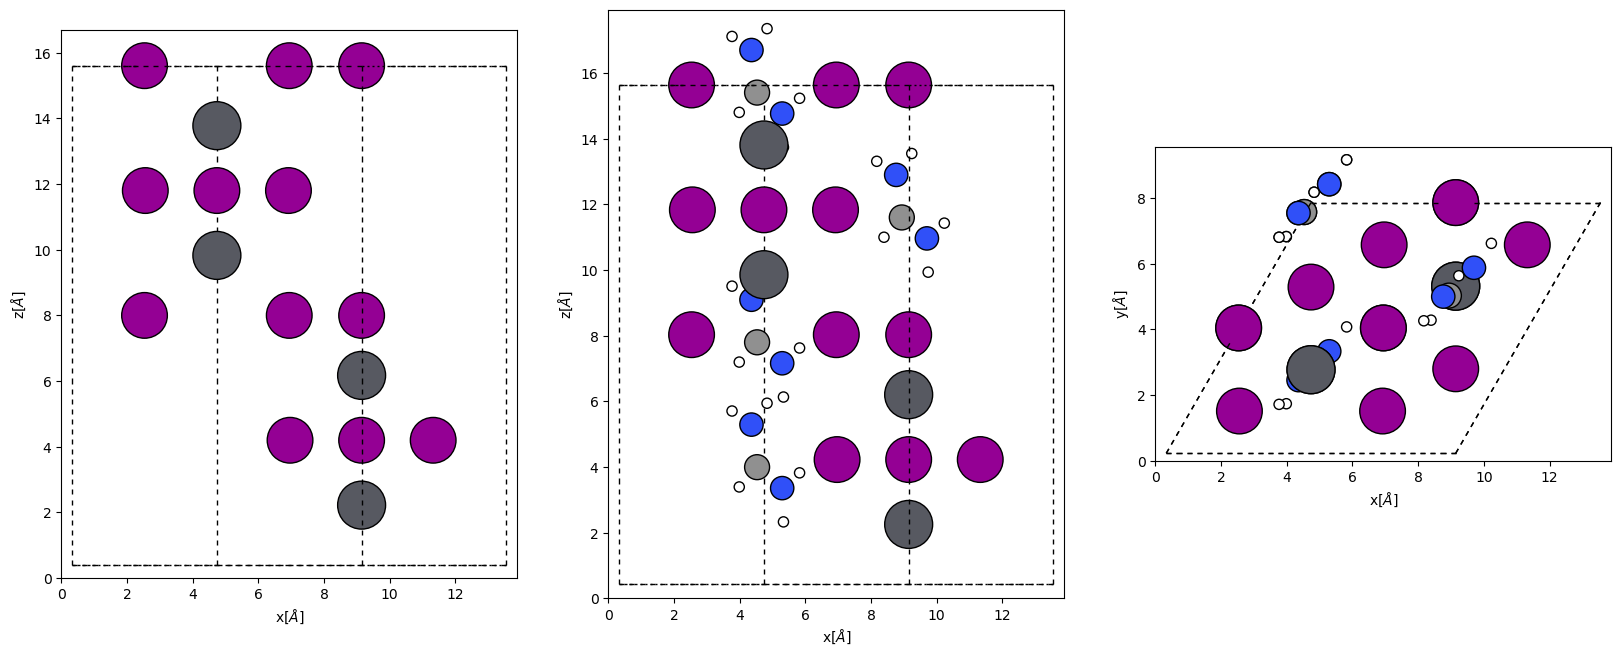

In [7]:
structure = io.read('4H_paul.cif')
structure = sort(structure)
tmp_molecule=[]
j = 0
num_atoms = len(structure.get_chemical_symbols())
i = 0
del_index = []
N_index = []
flag = False

while i < num_atoms:
    if(structure.get_chemical_symbols()[i] == 'N'):
        del_index.append(i)
    if(structure.get_chemical_symbols()[i] == 'C'):
        del_index.append(i)
        molecule = io.read('FA.pdb')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1

del structure[del_index]  

FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

view (FA_replaced_structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(structure)

In [10]:
supercell = FA_replaced_structure.repeat((1,1,3))
supercell = sort(supercell)

write_vasp('4H_113.vasp', supercell, vasp5=True, direct=True)
view(supercell)
supercell

Atoms(symbols='C12H60I36N24Pb12', pbc=True, cell=[[8.8136, 0.0, 0.0], [-4.406799999999998, 7.632801498794528, 0.0], [0.0, 0.0, 45.6228]], atomtypes=..., bfactor=..., occupancy=..., residuenames=..., residuenumbers=..., spacegroup_kinds=...)

## 6H-FAPbI3 polymorph: 10.1021/acsenergylett.7b00981
   - Experimental data
     - cell parameters  8.8436(4)  8.8436(4) 22.4524(12)  90  90 120
     - space_group_crystal_system       'hexagonal'
     - space_group_name_H-M_alt         'P 63/m m c'
     - space_group_name_Hall            '-P 6c 2c'


/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'hexagonal' is not interpreted for space group Spacegroup(194, setting=1). This may result in wrong setting!
  warnings.warn(


Text(0, 0.5, 'y[$\\AA$]')

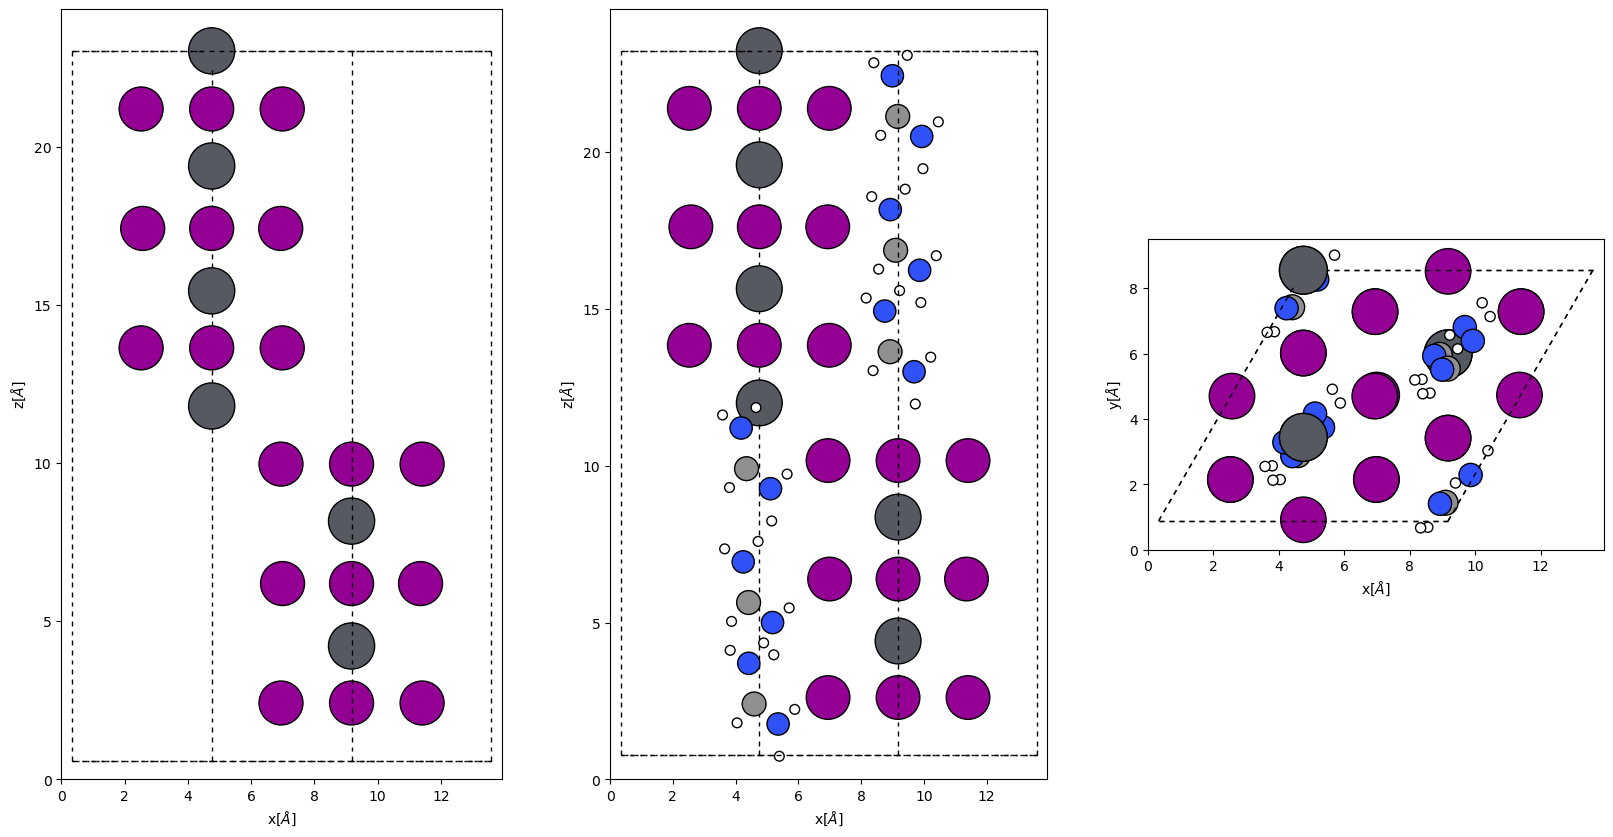

In [8]:
structure = io.read('6H_paul.cif')
structure = sort(structure)
tmp_molecule=[]
i = 0 
j = 0
k = 0
x = 0
y = 0
del_index = []
N_index = []
flag = False

while k < len(structure.get_chemical_symbols()):
    cutOff = neighborlist.natural_cutoffs(structure)
    nl = neighborlist.NeighborList(cutOff, self_interaction=False, bothways=True)
    nl.update(structure)
    if(structure.get_chemical_symbols()[k] == 'C'):
        x = nl.get_neighbors(k)
        y = x[0]
        del structure[y]
    k = k + 1
view(structure)

while i < len(structure.get_chemical_symbols()):
    if(structure.get_chemical_symbols()[i] == 'N'):
        del_index.append(i)
    if(structure.get_chemical_symbols()[i] == 'C'):
        del_index.append(i)
        molecule = io.read('FA.pdb')
        molecule.set_cell(structure.cell)
        xmin = molecule.get_center_of_mass()[0]
        xmax = structure.positions[i, 0]
        ymin = molecule.get_center_of_mass()[1]
        ymax = structure.positions[i, 1]
        zmin = molecule.get_center_of_mass()[2]
        zmax = structure.positions[i, 2]
        molecule.positions += (xmax - xmin, ymax - ymin, zmax - zmin)   
        if j==0:
            tmp_molecule = molecule 
        else:
            tmp_molecule += molecule
        j = j+1
    i = i + 1

del structure[del_index]  

FA_replaced_structure = structure + tmp_molecule
FA_replaced_structure = sort(FA_replaced_structure)

view (FA_replaced_structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(FA_replaced_structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

#view(structure)

In [9]:
supercell = FA_replaced_structure.repeat((1,1,1))
supercell = sort(supercell)

write_vasp('6H_111.vasp', supercell, vasp5=True, direct=True)
view(supercell)

supercell

Atoms(symbols='C6H30I18N12Pb6', pbc=True, cell=[[8.8436, 0.0, 0.0], [-4.421799999999998, 7.658782260908063, 0.0], [0.0, 0.0, 22.4524]], atomtypes=..., bfactor=..., occupancy=..., residuenames=..., residuenumbers=..., spacegroup_kinds=...)